# PPProjecct

In [1]:
!pip install probaforms -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 614.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 7.6 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.1.0+cu121
    Uninstalling torch-2.1.0+cu121:
      Successfully uninstalled torch-2.1.0+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.1.0+cu121 requires torch==2.1.0, but you have torch 1.13.1 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 1.13.1 which is incompatible.
torchtext 0.16.0 requires torch==2.1.0, but you have torch 1.13.1 

## Data

In [2]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('train_cache.csv')
train.head()

,iops,lat,block_size,n_jobs,iodepth,read_fraction,load_type,io_type,raid,n_disks,device_type,offset,id
0,712511,386627.74,8,46,6,100,random,read,4+1,24,nvme,0,hse-09142022-013313-z3769
1,709311,388112.33,8,46,6,100,random,read,4+1,24,nvme,0,hse-09142022-013313-z3769
2,712464,386384.72,8,46,6,100,random,read,4+1,24,nvme,0,hse-09142022-013313-z3769
3,711226,387053.72,8,46,6,100,random,read,4+1,24,nvme,0,hse-09142022-013313-z3769
4,710919,387191.78,8,46,6,100,random,read,4+1,24,nvme,0,hse-09142022-013313-z3769


In [4]:
test = pd.read_csv('test_cache.csv')
test.head()

,iops,lat,block_size,n_jobs,iodepth,read_fraction,load_type,io_type,raid,n_disks,device_type,offset,id
0,21483,613944.00,256,8,4,45,random,read,4+1,24,nvme,0,hse-09132022-180712-z63065
1,21354,610190.00,256,8,4,45,random,read,4+1,24,nvme,0,hse-09132022-180712-z63065
2,20883,613910.75,256,8,4,45,random,read,4+1,24,nvme,0,hse-09132022-180712-z63065
3,21493,610052.62,256,8,4,45,random,read,4+1,24,nvme,0,hse-09132022-180712-z63065
4,21473,606866.62,256,8,4,45,random,read,4+1,24,nvme,0,hse-09132022-180712-z63065


In [5]:
pd.unique(train[['block_size']]. values.ravel())

array([  8,  16,  32,  64, 256,   4, 128])

In [6]:
pd.unique(train[['n_jobs']]. values.ravel()).size

32

In [7]:
pd.unique(train[['iodepth']]. values.ravel()).size

16

In [8]:
pd.unique(train[['read_fraction']]. values.ravel()).size

101

In [9]:
pd.unique(train[['io_type']]. values.ravel())

array(['read', 'write'], dtype=object)

In [10]:
pd.unique(train[['id']]. values.ravel()).size

408

In [11]:
test['id'] = test['id'] + '-' + test['io_type']

In [12]:
test['io_type_num'] = test['io_type'] == 'write'

In [13]:
test.io_type_num = test.io_type_num.replace({ True : 1 , False : 0 })

In [14]:
y_test = torch.tensor(test[['iops', 'lat']].values)

In [15]:
X_test = torch.tensor(test[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)

In [16]:
print(len(y_test), len(X_test))

12120 12120


In [17]:
train['id'] = train['id'] + '-' + train['io_type']

In [18]:
train['io_type_num'] = train['io_type'] == 'write'

In [19]:
train.io_type_num = train.io_type_num.replace({ True : 1 , False : 0 })

In [20]:
y_tr = torch.tensor(train[['iops', 'lat']].values)

In [21]:
X_tr = torch.tensor(train[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)

In [22]:
pd.unique(train[['id']]. values.ravel())

array(['hse-09142022-013313-z3769-read',
       'hse-09132022-220621-z47654-read',
       'hse-09132022-220621-z47654-write',
       'hse-09132022-145656-z44664-read',
       'hse-09132022-145656-z44664-write',
       'hse-09132022-114106-z26207-read',
       'hse-09132022-114106-z26207-write',
       'hse-09132022-193036-z66798-read',
       'hse-09132022-193036-z66798-write',
       'hse-09132022-144055-z72468-read',
       'hse-09132022-144055-z72468-write',
       'hse-09132022-204254-z78794-read',
       'hse-09132022-204254-z78794-write',
       'hse-09132022-225919-z97534-read',
       'hse-09132022-225919-z97534-write',
       'hse-09132022-231343-z49201-read',
       'hse-09132022-231343-z49201-write',
       'hse-09142022-005311-z97289-read',
       'hse-09142022-005311-z97289-write',
       'hse-09132022-181650-z73563-read',
       'hse-09132022-181650-z73563-write',
       'hse-09132022-183252-z8604-read',
       'hse-09132022-183252-z8604-write',
       'hse-09132022-23120

In [23]:
pd.unique(test[['id']]. values.ravel())

array(['hse-09132022-180712-z63065-read',
       'hse-09132022-180712-z63065-write',
       'hse-09132022-212616-z36709-read',
       'hse-09132022-212616-z36709-write',
       'hse-09132022-203942-z36542-read',
       'hse-09132022-203942-z36542-write',
       'hse-09132022-113615-z47578-read',
       'hse-09132022-113615-z47578-write',
       'hse-09132022-113127-z92275-read',
       'hse-09132022-113127-z92275-write',
       'hse-09132022-202959-z97080-read',
       'hse-09132022-202959-z97080-write',
       'hse-09132022-130756-z72964-read',
       'hse-09132022-130756-z72964-write',
       'hse-09132022-152621-z23474-read',
       'hse-09132022-152621-z23474-write',
       'hse-09132022-222402-z67880-read',
       'hse-09132022-222402-z67880-write',
       'hse-09142022-002727-z41754-read',
       'hse-09142022-002727-z41754-write',
       'hse-09132022-215503-z42747-read',
       'hse-09132022-215503-z42747-write',
       'hse-09132022-154850-z69269-read',
       'hse-09132022-15

In [24]:
# id + "read" or "write" done

## Outliers

using z-score

In [25]:
new_train = pd.DataFrame()

In [26]:
from scipy import stats

In [27]:
for idd in pd.unique(train[['id']]. values.ravel()):
    arr = train[train['id'] == idd]
    z = stats.zscore(arr[['iops', 'lat']])
    z_mask = (np.abs(z) < 3).all(axis = 1)
    arr_z = arr[z_mask]
    new_train = pd.concat([new_train, arr_z], ignore_index=True)

In [28]:
print(len(train))
print(len(new_train))

48480
47458


In [29]:
new_test = pd.DataFrame()

In [30]:
for idd in pd.unique(test[['id']]. values.ravel()):
    arr = test[test['id'] == idd]
    z = stats.zscore(arr[['iops', 'lat']])
    z_mask = (np.abs(z) < 3).all(axis = 1)
    arr_z = arr[z_mask]
    new_test = pd.concat([new_test, arr_z], ignore_index=True)

In [31]:
print(len(test))
print(len(new_test))

12120
11867


## Scalers

In [37]:
from sklearn.base import TransformerMixin, BaseEstimator
import numpy as np
from dataclasses import dataclass

# from https://github.com/HEPML-AnomalyDetection/CATHODE/blob/4e96989296193da18508710afbfa3b37fffe5952/data_handler.py
def logit_transform_inverse(data, datamin, datamax):
    dataout = (datamin + datamax*np.exp(data))/(1 + np.exp(data))
    return dataout

def quick_logit(x, x_min, x_max, eps):
    x_norm = (x-x_min)/(x_max-x_min)
    x_norm = x_norm[((x_norm != 0) & (x_norm != 1)).all(axis=1)]
    x_norm[x_norm == 0] += eps
    x_norm[x_norm == 1] -= eps
    logit = np.log(x_norm/(1-x_norm))
    logit = logit[~np.isnan(logit).any(axis=1)]
    return logit

class LogitScaler(TransformerMixin, BaseEstimator):

    def __init__(self, eps=1e-6):
        super().__init__()
        self.eps = eps
        self.x_max = None
        self.x_min = None

    def fit(self, X, y=None):
        self.x_min = np.min(X, axis=0) - self.eps
        self.x_max = np.max(X, axis=0) + self.eps
        return self

    def transform(self, X):
        return quick_logit(X, self.x_min, self.x_max, self.eps)

    def inverse_transform(self, X):
        return logit_transform_inverse(X, self.x_min, self.x_max)

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = make_pipeline(LogitScaler(eps=0.1), StandardScaler())

In [39]:
y_tr_ss = scaler.fit_transform(train[['iops', 'lat']].values)
y_test_ss = scaler.transform(test[['iops', 'lat']].values)

<ipython-input-37-a80eb4482932>:15: RuntimeWarning: invalid value encountered in log
  logit = np.log(x_norm/(1-x_norm))


In [40]:
stscaler = StandardScaler()

In [41]:
X_tr_ss = stscaler.fit_transform(train[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
X_test_ss = stscaler.transform(test[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)

## Graphs

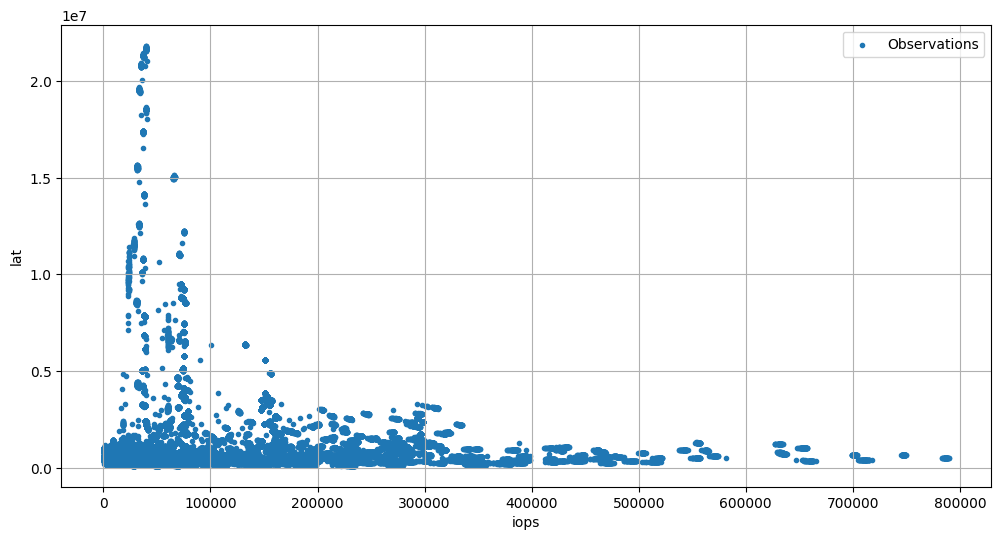

In [42]:
plt.figure(figsize=(12, 6))
plt.scatter(y_tr[:, 0], y_tr[:, 1], marker='.', label='Observations', linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

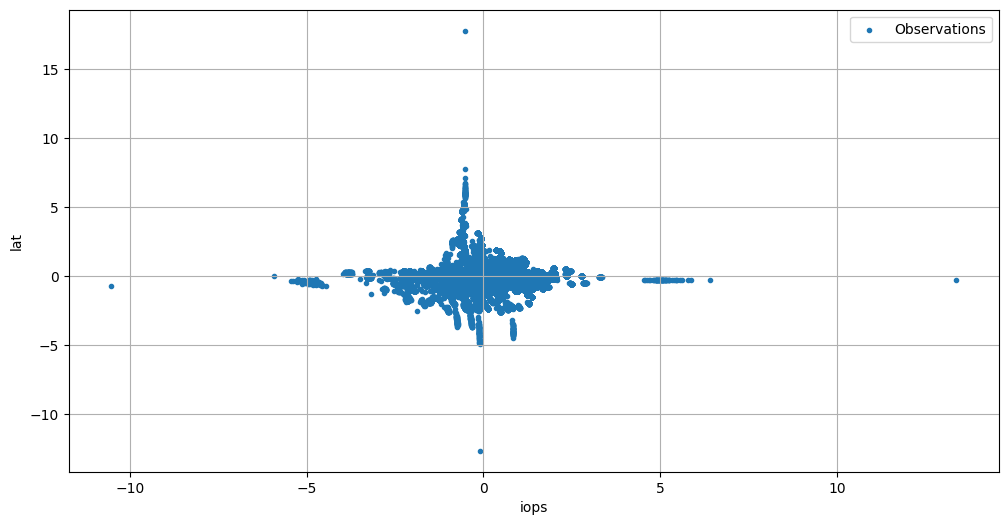

In [43]:
scaler = make_pipeline(LogitScaler(eps=0.01), StandardScaler())
y_tr_ss = torch.tensor(scaler.fit_transform(train[['iops', 'lat']].values))

plt.figure(figsize=(12, 6))
plt.scatter(y_tr_ss[:, 0], y_tr_ss[:, 1], marker='.', label='Observations', linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

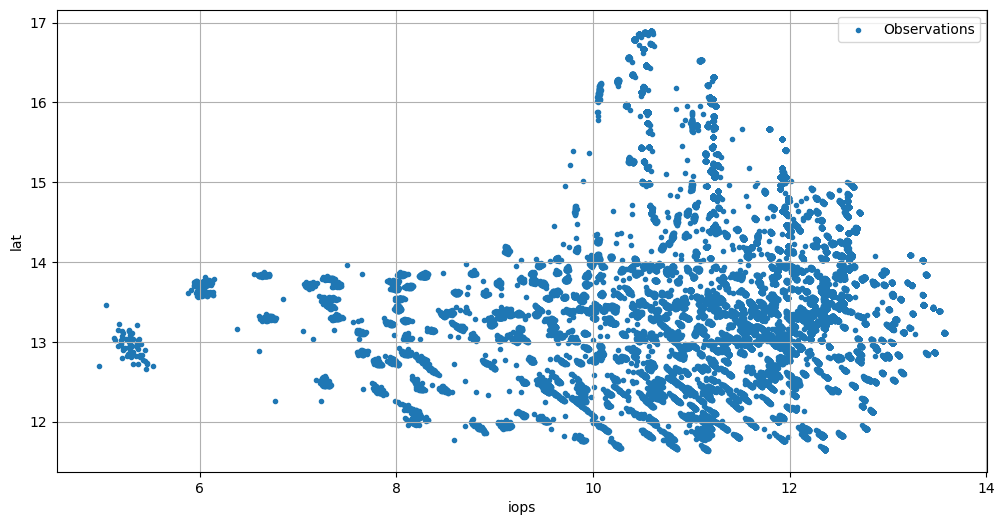

In [44]:
y_tr_ss = torch.tensor(np.log(train[['iops', 'lat']].values))

plt.figure(figsize=(12, 6))
plt.scatter(y_tr_ss[:, 0], y_tr_ss[:, 1], marker='.', label='Observations', linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

## Graphs without outliers

In [45]:
y_tr_w = torch.tensor(new_train[['iops', 'lat']].values)

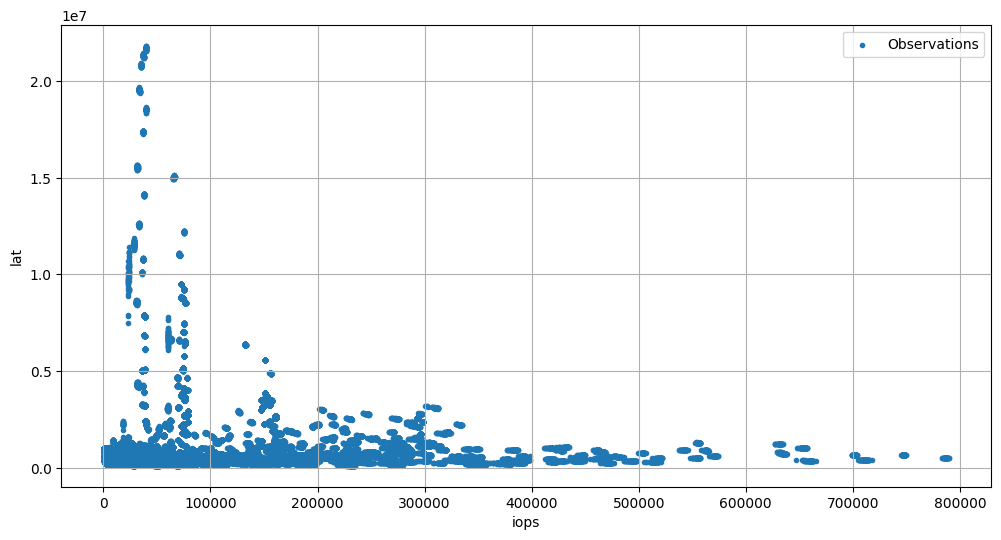

In [46]:
plt.figure(figsize=(12, 6))
plt.scatter(y_tr_w[:, 0], y_tr_w[:, 1], marker='.', label='Observations', linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

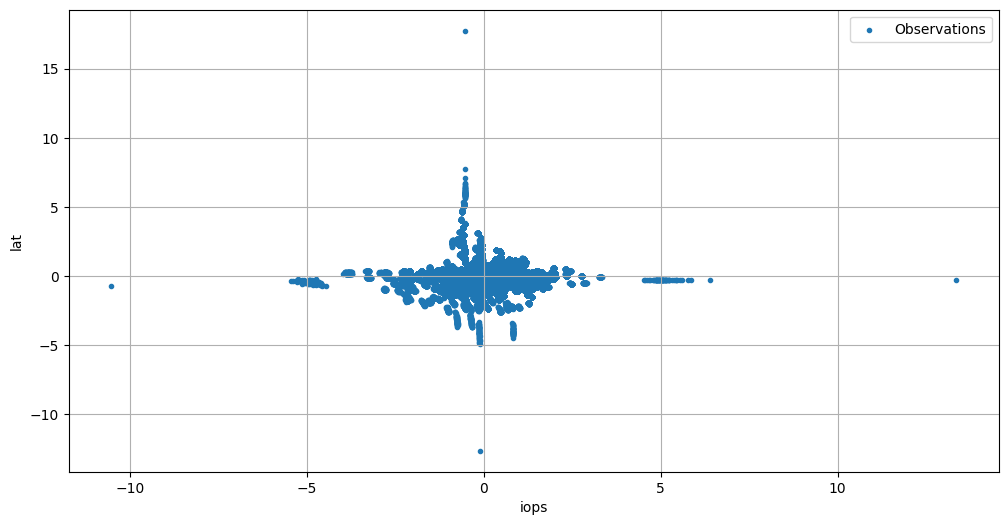

In [47]:
scaler = make_pipeline(LogitScaler(eps=0.01), StandardScaler())
y_tr_ss = torch.tensor(scaler.fit_transform(new_train[['iops', 'lat']].values))

plt.figure(figsize=(12, 6))
plt.scatter(y_tr_ss[:, 0], y_tr_ss[:, 1], marker='.', label='Observations', linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

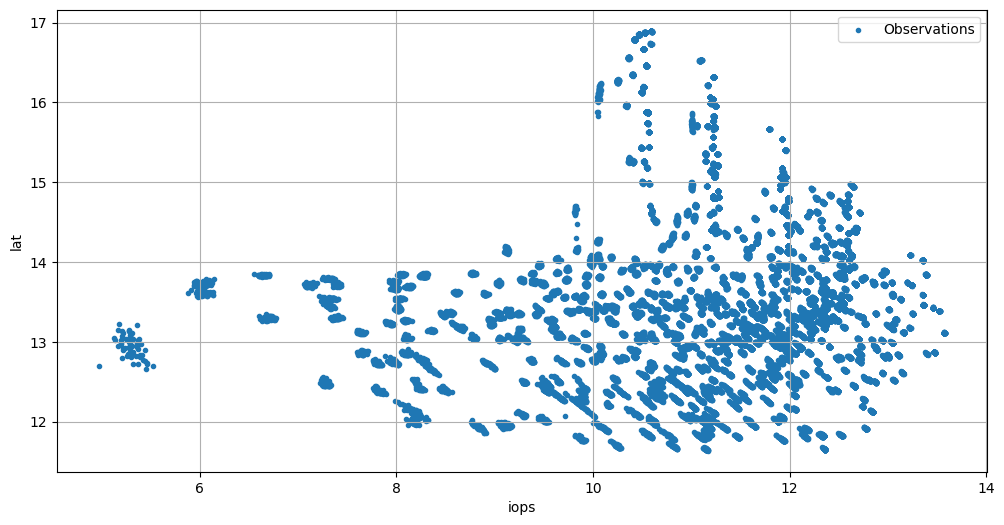

In [48]:
y_tr_ss = torch.tensor(np.log(new_train[['iops', 'lat']].values))

plt.figure(figsize=(12, 6))
plt.scatter(y_tr_ss[:, 0], y_tr_ss[:, 1], marker='.', label='Observations', linewidth=1)
# оси
plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

## Final experiments

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from probaforms.models import RealNVP
from probaforms import metrics

In [50]:
train = train
scaler = make_pipeline(LogitScaler(eps=0.01), StandardScaler())
y_tr_ss = scaler.fit_transform(train[['iops', 'lat']].values)
# y_test_ss = scaler.transform(test[['iops', 'lat']].values)
stscaler = StandardScaler()
X_tr_ss = stscaler.fit_transform(train[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
# X_test_ss = stscaler.transform(test[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)

model = RealNVP(lr=0.001, n_layers=12, n_epochs=100, batch_size=64, hidden=(100,)) # 200 , hidden=(100,), activation='relu'
model.fit(y_tr_ss, X_tr_ss) # (target, condition)

In [51]:
def calc_metrics(X, Y):
    mu, sigma = metrics.frechet_distance(X, Y)
    print(r"Frechet Distance         = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.kolmogorov_smirnov_1d(X, Y)
    print(r"Kolmogorov-Smirnov       = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.cramer_von_mises_1d(X, Y)
    print(r"Cramer-von Mises         = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.anderson_darling_1d(X, Y)
    print(r"Anderson-Darling         = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.roc_auc_score_1d(X, Y)
    print(r"ROC AUC                  = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.kullback_leibler_1d_kde(X, Y)
    print(r"Kullback-Leibler KDE     = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.jensen_shannon_1d_kde(X, Y)
    print(r"Jensen-Shannon KDE       = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.maximum_mean_discrepancy(X, Y)
    print(r"Maximum Mean Discrepancy = %.4f +- %.4f" % (mu, sigma))

### RESULTS (TRAIN)

In [69]:
from torch.utils.data import TensorDataset, DataLoader

In [70]:
ids = ['hse-09132022-234723-z24647-read', 'hse-09132022-155203-z5570-read',
       'hse-09132022-234723-z24647-write', 'hse-09132022-155203-z5570-write']
ztotal_iops = []
ztotal_lat = []
zgen_iops = []
zgen_lat = []

total_iops = []
total_lat = []
gen_iops = []
gen_lat = []
for i in range(len(ids)):
    y_train = torch.tensor(train[train['id'] == ids[i]][['iops', 'lat']].values)
    total_iops.append(y_train[:, 0])
    total_lat.append(y_train[:, 1])
    X_train = torch.tensor(train[train['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
    y_train_ss = scaler.transform(y_train)
    X_train_ss = stscaler.transform(X_train)
    y_tst = torch.tensor(y_train_ss, dtype=torch.float32)
    X_tst = torch.tensor(X_train_ss, dtype=torch.float32)
    # print(len(y_tst), len(X_tst))
    dataset = TensorDataset(y_tst, X_tst)
    results_iops = []
    results_lat = []
    for j, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        results_iops.append(y_data[0][0])
        results_lat.append(y_data[0][1])

    X_bigger = torch.tensor(list(train[train['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values) * 17)
    X_bigger_ss = stscaler.transform(X_bigger)
    X_bigger_tst = torch.tensor(X_bigger_ss, dtype=torch.float32)
    y_gen = model.sample(stscaler.transform(X_bigger.clone().detach()))
    y_gen = torch.tensor(y_gen, dtype=torch.float32)
    gen_iops.append(scaler.inverse_transform(y_gen)[:, 0])
    gen_lat.append(scaler.inverse_transform(y_gen)[:, 1])
    dataset = TensorDataset(y_gen, X_bigger_tst)
    genresults_iops = []
    genresults_lat = []
    for i, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        genresults_iops.append(y_data[0][0])
        genresults_lat.append(y_data[0][1])

    ztotal_iops.append(results_iops)
    ztotal_lat.append(results_lat)
    zgen_iops.append(genresults_iops)
    zgen_lat.append(genresults_lat)

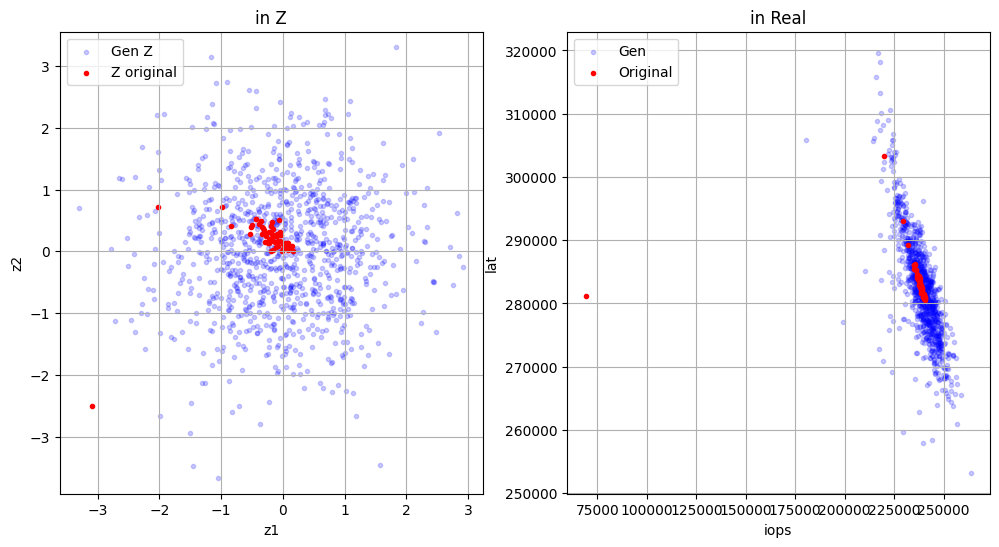

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[0], zgen_lat[0], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[0], ztotal_lat[0], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[0], gen_lat[0], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[0], total_lat[0], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [72]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[0])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[0])])
arr3 = np.array([[el] for el in np.array(zgen_iops[0])])
arr4 = np.array([[el] for el in np.array(zgen_lat[0])])

In [73]:
print('In Z:')
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

In Z:
Frechet Distance         = 0.9242 +- 0.3109
Kolmogorov-Smirnov       = 0.4556 +- 0.0149
Cramer-von Mises         = 2.8821 +- 0.2411
Anderson-Darling         = 17.0289 +- 1.4449
ROC AUC                  = 0.5716 +- 0.0153
Kullback-Leibler KDE     = 0.3120 +- 0.0218
Jensen-Shannon KDE       = 0.0893 +- 0.0066
Maximum Mean Discrepancy = 0.1082 +- 0.0105


In [74]:
# arr1 = np.array([[el] for el in np.array(total_iops[0])])
# arr2 = np.array([[el] for el in np.array(total_lat[0])])
# arr3 = np.array([[el] for el in np.array(gen_iops[0])])
# arr4 = np.array([[el] for el in np.array(gen_lat[0])])

In [75]:
# print('In Real:')
# calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

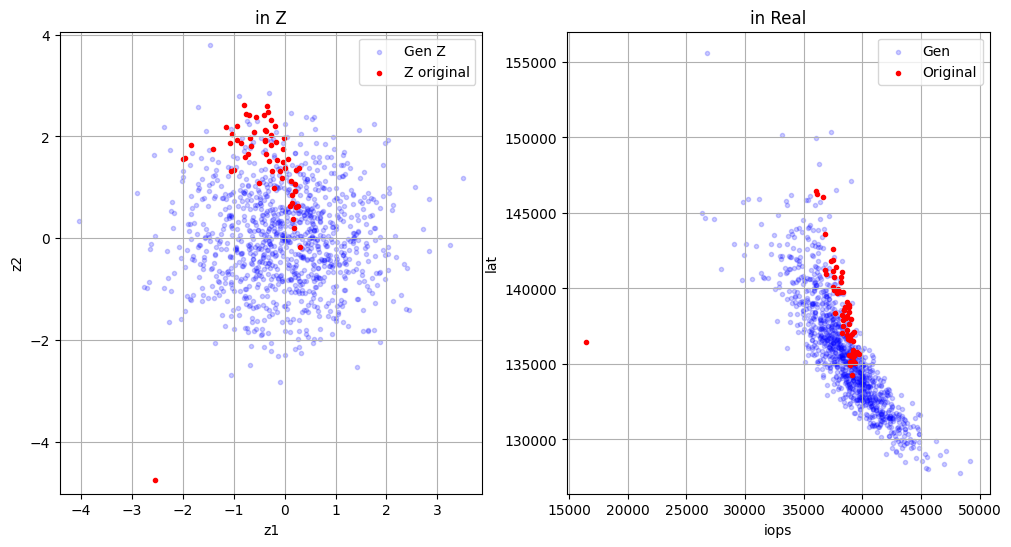

In [76]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[1], zgen_lat[1], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[1], ztotal_lat[1], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[1], gen_lat[1], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[1], total_lat[1], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [77]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[1])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[1])])
arr3 = np.array([[el] for el in np.array(zgen_iops[1])])
arr4 = np.array([[el] for el in np.array(zgen_lat[1])])

In [78]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 2.8358 +- 0.4269
Kolmogorov-Smirnov       = 0.5499 +- 0.0214
Cramer-von Mises         = 6.9072 +- 0.6569
Anderson-Darling         = 53.1386 +- 5.9249
ROC AUC                  = 0.7723 +- 0.0170
Kullback-Leibler KDE     = 0.8227 +- 0.0899
Jensen-Shannon KDE       = 0.1762 +- 0.0156
Maximum Mean Discrepancy = 0.4173 +- 0.0432


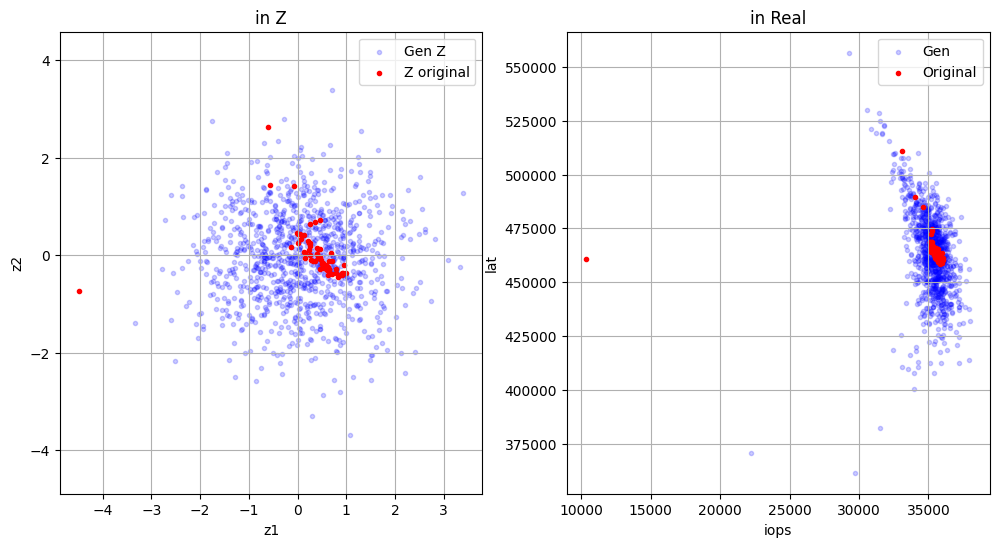

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[2], zgen_lat[2], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[2], ztotal_lat[2], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[2], gen_lat[2], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[2], total_lat[2], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [80]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[2])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[2])])
arr3 = np.array([[el] for el in np.array(zgen_iops[2])])
arr4 = np.array([[el] for el in np.array(zgen_lat[2])])

In [81]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 0.6803 +- 0.3685
Kolmogorov-Smirnov       = 0.3613 +- 0.0261
Cramer-von Mises         = 2.1004 +- 0.3677
Anderson-Darling         = 12.5674 +- 2.1334
ROC AUC                  = 0.5780 +- 0.0129
Kullback-Leibler KDE     = 0.2886 +- 0.0415
Jensen-Shannon KDE       = 0.0744 +- 0.0091
Maximum Mean Discrepancy = 0.1030 +- 0.0142


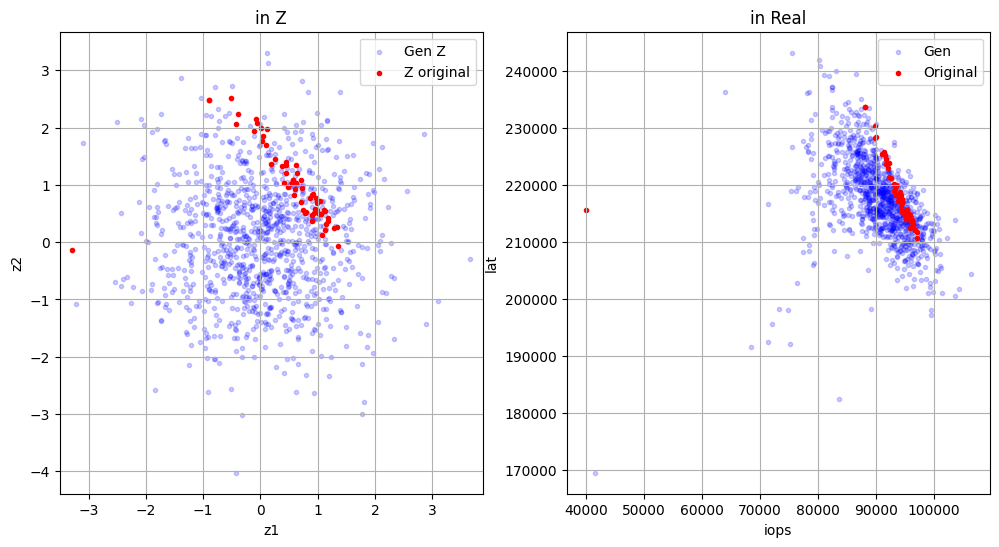

In [82]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[3], zgen_lat[3], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[3], ztotal_lat[3], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[3], gen_lat[3], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[3], total_lat[3], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [83]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[3])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[3])])
arr3 = np.array([[el] for el in np.array(zgen_iops[3])])
arr4 = np.array([[el] for el in np.array(zgen_lat[3])])

In [84]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 1.6846 +- 0.3710
Kolmogorov-Smirnov       = 0.4613 +- 0.0301
Cramer-von Mises         = 4.5055 +- 0.3911
Anderson-Darling         = 27.8508 +- 2.5241
ROC AUC                  = 0.7392 +- 0.0129
Kullback-Leibler KDE     = 0.4034 +- 0.0286
Jensen-Shannon KDE       = 0.1079 +- 0.0092
Maximum Mean Discrepancy = 0.2477 +- 0.0186


### RESULTS (TEST)

In [89]:
from torch.utils.data import TensorDataset, DataLoader

In [90]:
ids = ['hse-09132022-203942-z36542-read', 'hse-09132022-192053-z87989-read',
       'hse-09132022-203942-z36542-write', 'hse-09132022-192053-z87989-write']
ztotal_iops = []
ztotal_lat = []
zgen_iops = []
zgen_lat = []

total_iops = []
total_lat = []
gen_iops = []
gen_lat = []
for i in range(len(ids)):
    y_test = torch.tensor(test[test['id'] == ids[i]][['iops', 'lat']].values)
    total_iops.append(y_test[:, 0])
    total_lat.append(y_test[:, 1])
    X_test = torch.tensor(test[test['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
    y_test_ss = scaler.transform(y_test)
    X_test_ss = stscaler.transform(X_test)
    y_tst = torch.tensor(y_test_ss, dtype=torch.float32)
    X_tst = torch.tensor(X_test_ss, dtype=torch.float32)
    # print(len(y_tst), len(X_tst))
    dataset = TensorDataset(y_tst, X_tst)
    results_iops = []
    results_lat = []
    for j, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        results_iops.append(y_data[0][0])
        results_lat.append(y_data[0][1])

    X_bigger = torch.tensor(list(test[test['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values) * 17)
    X_bigger_ss = stscaler.transform(X_bigger)
    X_bigger_tst = torch.tensor(X_bigger_ss, dtype=torch.float32)
    y_gen = model.sample(stscaler.transform(X_bigger.clone().detach()))
    y_gen = torch.tensor(y_gen, dtype=torch.float32)
    gen_iops.append(scaler.inverse_transform(y_gen)[:, 0])
    gen_lat.append(scaler.inverse_transform(y_gen)[:, 1])
    dataset = TensorDataset(y_gen, X_bigger_tst)
    genresults_iops = []
    genresults_lat = []
    for i, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        genresults_iops.append(y_data[0][0])
        genresults_lat.append(y_data[0][1])

    ztotal_iops.append(results_iops)
    ztotal_lat.append(results_lat)
    zgen_iops.append(genresults_iops)
    zgen_lat.append(genresults_lat)

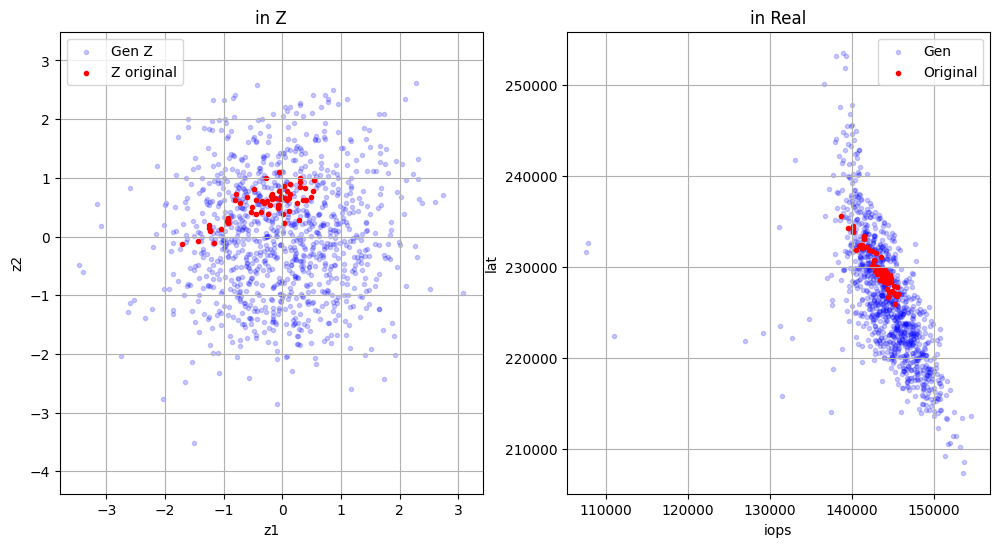

In [103]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[0], zgen_lat[0], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[0], ztotal_lat[0], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[0], gen_lat[0], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[0], total_lat[0], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [92]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[0])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[0])])
arr3 = np.array([[el] for el in np.array(zgen_iops[0])])
arr4 = np.array([[el] for el in np.array(zgen_lat[0])])

In [93]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 1.2536 +- 0.0810
Kolmogorov-Smirnov       = 0.4029 +- 0.0214
Cramer-von Mises         = 2.9726 +- 0.2515
Anderson-Darling         = 17.0094 +- 1.3766
ROC AUC                  = 0.6390 +- 0.0112
Kullback-Leibler KDE     = 0.3101 +- 0.0252
Jensen-Shannon KDE       = 0.0897 +- 0.0068
Maximum Mean Discrepancy = 0.1391 +- 0.0114


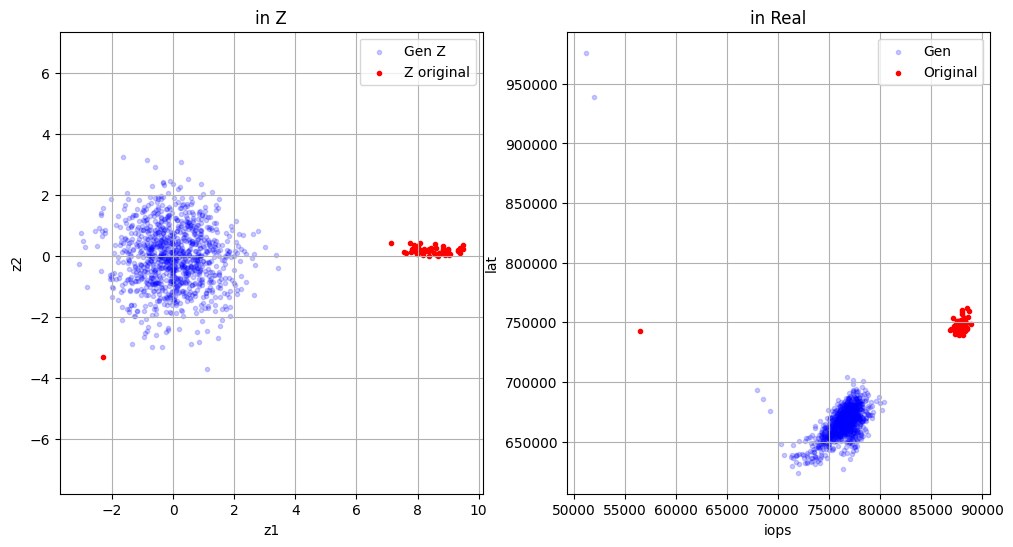

In [94]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[1], zgen_lat[1], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[1], ztotal_lat[1], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[1], gen_lat[1], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[1], total_lat[1], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [95]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[1])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[1])])
arr3 = np.array([[el] for el in np.array(zgen_iops[1])])
arr4 = np.array([[el] for el in np.array(zgen_lat[1])])

In [96]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 69.8398 +- 2.4458
Kolmogorov-Smirnov       = 0.7387 +- 0.0178
Cramer-von Mises         = 10.8517 +- 0.5413
Anderson-Darling         = 106.9382 +- 4.3537
ROC AUC                  = 0.7792 +- 0.0159
Kullback-Leibler KDE     = 6.6591 +- 0.1191
Jensen-Shannon KDE       = 0.3951 +- 0.0084
Maximum Mean Discrepancy = 1.5096 +- 0.0330


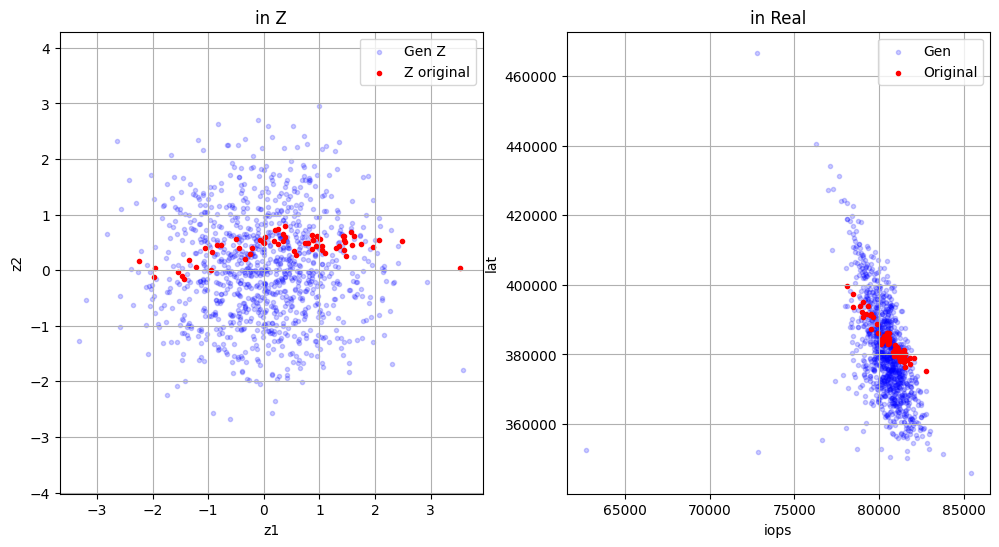

In [97]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[2], zgen_lat[2], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[2], ztotal_lat[2], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[2], gen_lat[2], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[2], total_lat[2], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [98]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[2])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[2])])
arr3 = np.array([[el] for el in np.array(zgen_iops[2])])
arr4 = np.array([[el] for el in np.array(zgen_lat[2])])

In [99]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 1.0123 +- 0.1627
Kolmogorov-Smirnov       = 0.3699 +- 0.0366
Cramer-von Mises         = 2.6727 +- 0.3868
Anderson-Darling         = 16.6362 +- 2.7892
ROC AUC                  = 0.6333 +- 0.0252
Kullback-Leibler KDE     = 0.2908 +- 0.0356
Jensen-Shannon KDE       = 0.0762 +- 0.0087
Maximum Mean Discrepancy = 0.0880 +- 0.0207


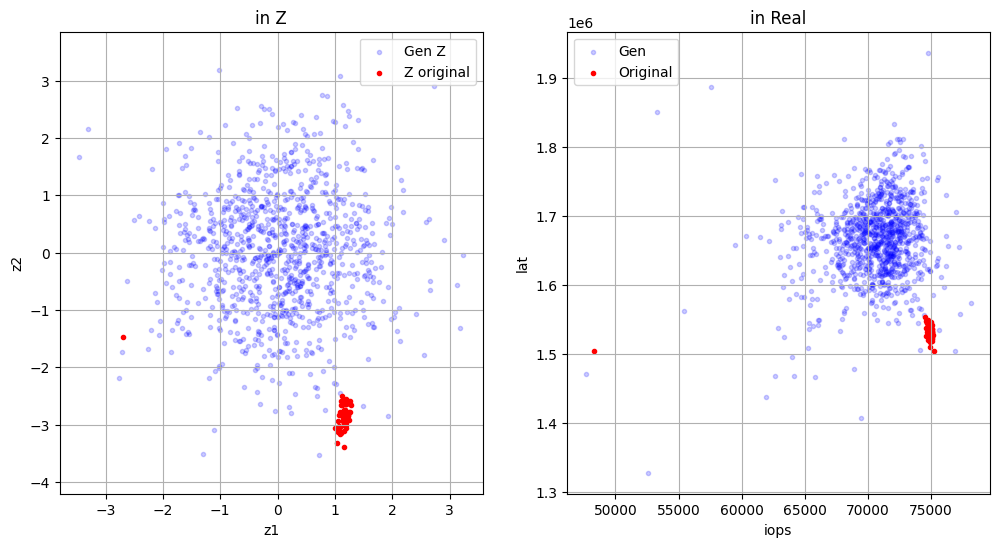

In [100]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[3], zgen_lat[3], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[3], ztotal_lat[3], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[3], gen_lat[3], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[3], total_lat[3], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [101]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[3])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[3])])
arr3 = np.array([[el] for el in np.array(zgen_iops[3])])
arr4 = np.array([[el] for el in np.array(zgen_lat[3])])

In [102]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 10.3203 +- 0.6265
Kolmogorov-Smirnov       = 0.9055 +- 0.0165
Cramer-von Mises         = 15.0893 +- 0.4605
Anderson-Darling         = 132.1911 +- 4.7181
ROC AUC                  = 0.9290 +- 0.0095
Kullback-Leibler KDE     = 2.3045 +- 0.1241
Jensen-Shannon KDE       = 0.4208 +- 0.0127
Maximum Mean Discrepancy = 1.0545 +- 0.0343


## Final experiments without outliers

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from probaforms.models import RealNVP
from probaforms import metrics

In [105]:
train = new_train.copy()
scaler = make_pipeline(LogitScaler(eps=0.01), StandardScaler())
y_tr_ss = scaler.fit_transform(train[['iops', 'lat']].values)
# y_test_ss = scaler.transform(test[['iops', 'lat']].values)
stscaler = StandardScaler()
X_tr_ss = stscaler.fit_transform(train[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
# X_test_ss = stscaler.transform(test[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)

model = RealNVP(lr=0.001, n_layers=12, n_epochs=100, batch_size=64, hidden=(100,)) # 200 , activation='relu'
model.fit(y_tr_ss, X_tr_ss) # (target, condition)

In [106]:
def calc_metrics(X, Y):
    mu, sigma = metrics.frechet_distance(X, Y)
    print(r"Frechet Distance         = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.kolmogorov_smirnov_1d(X, Y)
    print(r"Kolmogorov-Smirnov       = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.cramer_von_mises_1d(X, Y)
    print(r"Cramer-von Mises         = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.anderson_darling_1d(X, Y)
    print(r"Anderson-Darling         = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.roc_auc_score_1d(X, Y)
    print(r"ROC AUC                  = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.kullback_leibler_1d_kde(X, Y)
    print(r"Kullback-Leibler KDE     = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.jensen_shannon_1d_kde(X, Y)
    print(r"Jensen-Shannon KDE       = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.maximum_mean_discrepancy(X, Y)
    print(r"Maximum Mean Discrepancy = %.4f +- %.4f" % (mu, sigma))

### RESULTS (TRAIN)

In [110]:
from torch.utils.data import TensorDataset, DataLoader

In [111]:
a = torch.tensor(list(train[train['id'] == 'hse-09132022-234723-z24647-read'][['iops', 'lat']].values) * 17)
print(a)

tensor([[237495.0000, 282990.7100],
        [237975.0000, 283126.8900],
        [236411.0000, 284728.6400],
        ...,
        [237162.0000, 283795.3600],
        [238777.0000, 281577.5700],
        [239088.0000, 281640.3200]], dtype=torch.float64)


In [112]:
ids = ['hse-09132022-234723-z24647-read', 'hse-09132022-155203-z5570-read',
       'hse-09132022-234723-z24647-write', 'hse-09132022-155203-z5570-write']
ztotal_iops = []
ztotal_lat = []
zgen_iops = []
zgen_lat = []

total_iops = []
total_lat = []
gen_iops = []
gen_lat = []
for i in range(len(ids)):
    y_train = torch.tensor(train[train['id'] == ids[i]][['iops', 'lat']].values)
    total_iops.append(y_train[:, 0])
    total_lat.append(y_train[:, 1])
    X_train = torch.tensor(train[train['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
    y_train_ss = scaler.transform(y_train)
    X_train_ss = stscaler.transform(X_train)
    y_tst = torch.tensor(y_train_ss, dtype=torch.float32)
    X_tst = torch.tensor(X_train_ss, dtype=torch.float32)
    # print(len(y_tst), len(X_tst))
    dataset = TensorDataset(y_tst, X_tst)
    results_iops = []
    results_lat = []
    for j, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        results_iops.append(y_data[0][0])
        results_lat.append(y_data[0][1])

    X_bigger = torch.tensor(list(train[train['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values) * 17)
    X_bigger_ss = stscaler.transform(X_bigger)
    X_bigger_tst = torch.tensor(X_bigger_ss, dtype=torch.float32)
    y_gen = model.sample(stscaler.transform(X_bigger.clone().detach()))
    y_gen = torch.tensor(y_gen, dtype=torch.float32)
    gen_iops.append(scaler.inverse_transform(y_gen)[:, 0])
    gen_lat.append(scaler.inverse_transform(y_gen)[:, 1])
    dataset = TensorDataset(y_gen, X_bigger_tst)
    genresults_iops = []
    genresults_lat = []
    for i, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        genresults_iops.append(y_data[0][0])
        genresults_lat.append(y_data[0][1])

    ztotal_iops.append(results_iops)
    ztotal_lat.append(results_lat)
    zgen_iops.append(genresults_iops)
    zgen_lat.append(genresults_lat)

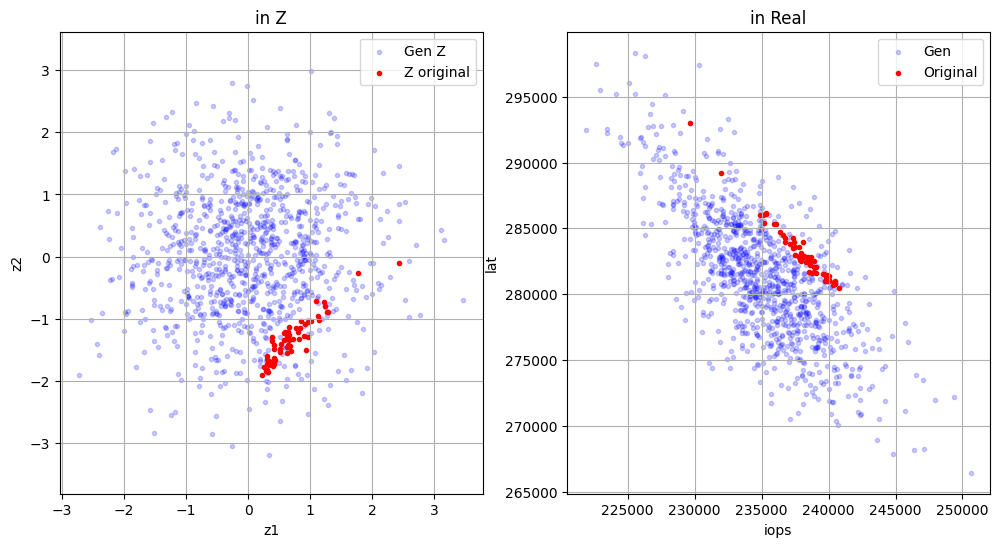

In [113]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[0], zgen_lat[0], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[0], ztotal_lat[0], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[0], gen_lat[0], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[0], total_lat[0], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [114]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[0])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[0])])
arr3 = np.array([[el] for el in np.array(zgen_iops[0])])
arr4 = np.array([[el] for el in np.array(zgen_lat[0])])

In [115]:
print('In Z:')
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

In Z:
Frechet Distance         = 3.2506 +- 0.1416
Kolmogorov-Smirnov       = 0.6713 +- 0.0217
Cramer-von Mises         = 8.4752 +- 0.3577
Anderson-Darling         = 54.5197 +- 3.1643
ROC AUC                  = 0.8212 +- 0.0087
Kullback-Leibler KDE     = 0.7626 +- 0.0492
Jensen-Shannon KDE       = 0.1988 +- 0.0112
Maximum Mean Discrepancy = 0.4566 +- 0.0212


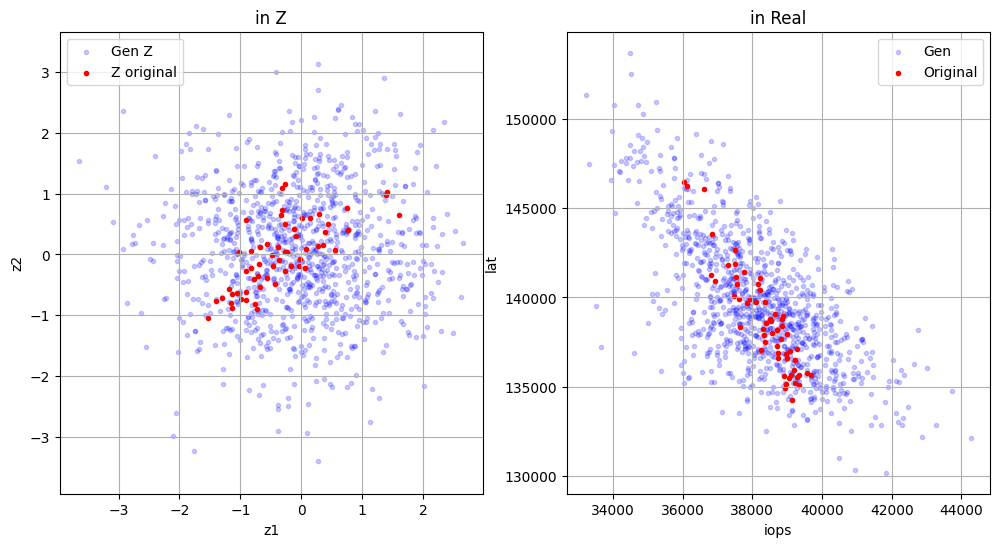

In [116]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[1], zgen_lat[1], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[1], ztotal_lat[1], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[1], gen_lat[1], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[1], total_lat[1], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [117]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[1])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[1])])
arr3 = np.array([[el] for el in np.array(zgen_iops[1])])
arr4 = np.array([[el] for el in np.array(zgen_lat[1])])

In [118]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 0.6756 +- 0.1081
Kolmogorov-Smirnov       = 0.2401 +- 0.0344
Cramer-von Mises         = 0.9905 +- 0.2883
Anderson-Darling         = 6.1229 +- 2.0154
ROC AUC                  = 0.5696 +- 0.0242
Kullback-Leibler KDE     = 0.1277 +- 0.0281
Jensen-Shannon KDE       = 0.0369 +- 0.0091
Maximum Mean Discrepancy = 0.0592 +- 0.0146


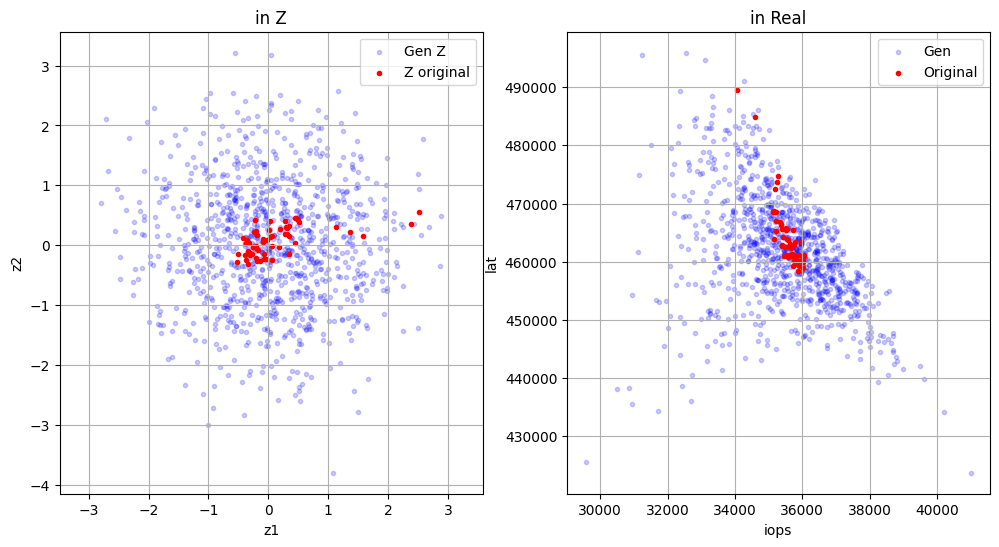

In [119]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[2], zgen_lat[2], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[2], ztotal_lat[2], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[2], gen_lat[2], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[2], total_lat[2], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [120]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[2])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[2])])
arr3 = np.array([[el] for el in np.array(zgen_iops[2])])
arr4 = np.array([[el] for el in np.array(zgen_lat[2])])

In [121]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 0.9485 +- 0.1009
Kolmogorov-Smirnov       = 0.3485 +- 0.0117
Cramer-von Mises         = 1.8439 +- 0.1537
Anderson-Darling         = 11.6145 +- 0.9360
ROC AUC                  = 0.5212 +- 0.0121
Kullback-Leibler KDE     = 0.2678 +- 0.0196
Jensen-Shannon KDE       = 0.0768 +- 0.0051
Maximum Mean Discrepancy = 0.0792 +- 0.0100


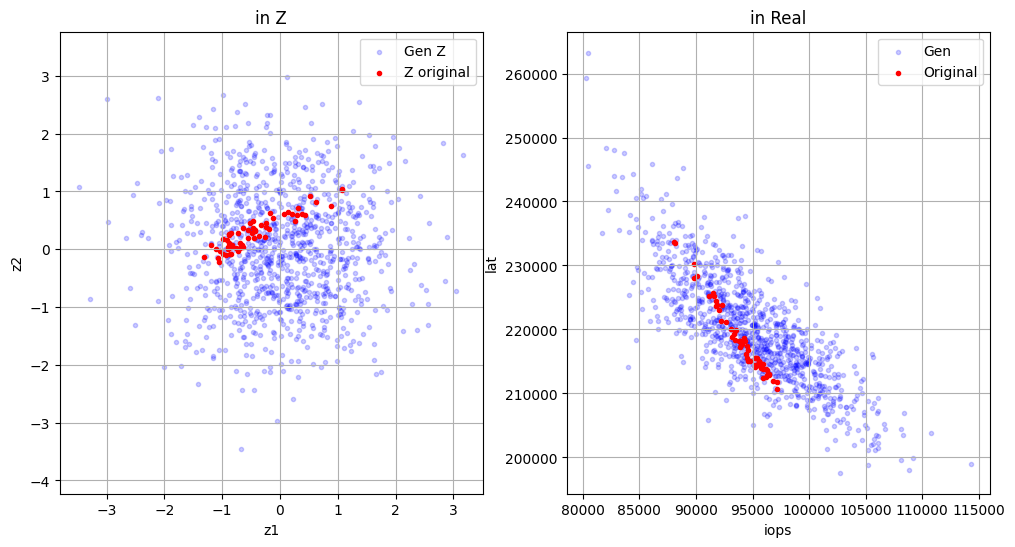

In [122]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[3], zgen_lat[3], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[3], ztotal_lat[3], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[3], gen_lat[3], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[3], total_lat[3], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [123]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[3])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[3])])
arr3 = np.array([[el] for el in np.array(zgen_iops[3])])
arr4 = np.array([[el] for el in np.array(zgen_lat[3])])

In [124]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 1.2170 +- 0.0824
Kolmogorov-Smirnov       = 0.3910 +- 0.0297
Cramer-von Mises         = 2.5259 +- 0.3946
Anderson-Darling         = 14.6646 +- 2.2756
ROC AUC                  = 0.6355 +- 0.0109
Kullback-Leibler KDE     = 0.2620 +- 0.0302
Jensen-Shannon KDE       = 0.0745 +- 0.0090
Maximum Mean Discrepancy = 0.1276 +- 0.0164


### RESULTS (TEST)

In [125]:
from torch.utils.data import TensorDataset, DataLoader

In [126]:
test = new_test

In [127]:
ids = ['hse-09132022-203942-z36542-read', 'hse-09132022-192053-z87989-read',
       'hse-09132022-203942-z36542-write', 'hse-09132022-192053-z87989-write']
ztotal_iops = []
ztotal_lat = []
zgen_iops = []
zgen_lat = []

total_iops = []
total_lat = []
gen_iops = []
gen_lat = []
for i in range(len(ids)):
    y_test = torch.tensor(test[test['id'] == ids[i]][['iops', 'lat']].values)
    total_iops.append(y_test[:, 0])
    total_lat.append(y_test[:, 1])
    X_test = torch.tensor(test[test['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
    y_test_ss = scaler.transform(y_test)
    X_test_ss = stscaler.transform(X_test)
    y_tst = torch.tensor(y_test_ss, dtype=torch.float32)
    X_tst = torch.tensor(X_test_ss, dtype=torch.float32)
    # print(len(y_tst), len(X_tst))
    dataset = TensorDataset(y_tst, X_tst)
    results_iops = []
    results_lat = []
    for j, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        results_iops.append(y_data[0][0])
        results_lat.append(y_data[0][1])

    X_bigger = torch.tensor(list(test[test['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values) * 17)
    X_bigger_ss = stscaler.transform(X_bigger)
    X_bigger_tst = torch.tensor(X_bigger_ss, dtype=torch.float32)
    y_gen = model.sample(stscaler.transform(X_bigger.clone().detach()))
    y_gen = torch.tensor(y_gen, dtype=torch.float32)
    gen_iops.append(scaler.inverse_transform(y_gen)[:, 0])
    gen_lat.append(scaler.inverse_transform(y_gen)[:, 1])
    dataset = TensorDataset(y_gen, X_bigger_tst)
    genresults_iops = []
    genresults_lat = []
    for i, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        genresults_iops.append(y_data[0][0])
        genresults_lat.append(y_data[0][1])

    ztotal_iops.append(results_iops)
    ztotal_lat.append(results_lat)
    zgen_iops.append(genresults_iops)
    zgen_lat.append(genresults_lat)

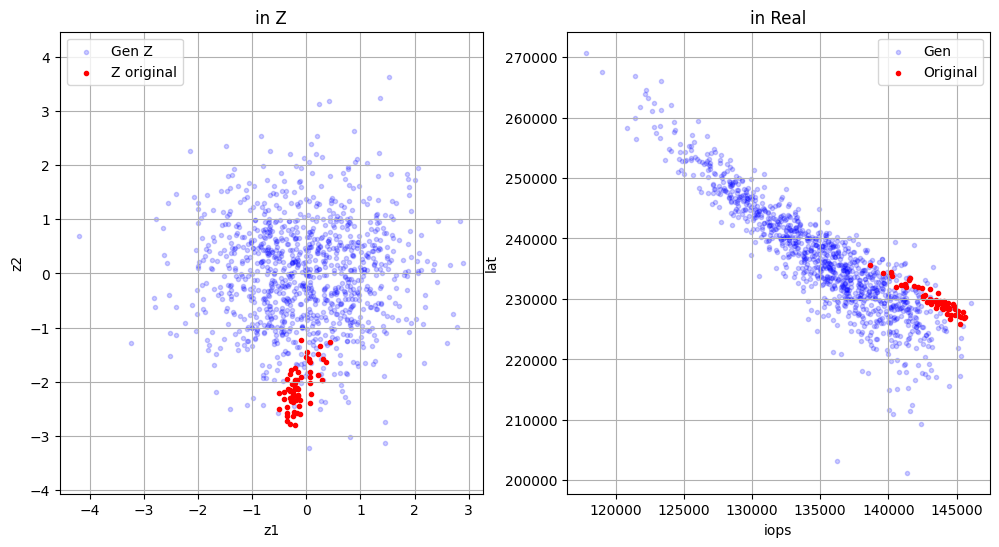

In [128]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[0], zgen_lat[0], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[0], ztotal_lat[0], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[0], gen_lat[0], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[0], total_lat[0], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [129]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[0])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[0])])
arr3 = np.array([[el] for el in np.array(zgen_iops[0])])
arr4 = np.array([[el] for el in np.array(zgen_lat[0])])

In [130]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 5.4009 +- 0.2602
Kolmogorov-Smirnov       = 0.6410 +- 0.0133
Cramer-von Mises         = 9.8417 +- 0.2328
Anderson-Darling         = 83.7702 +- 3.9070
ROC AUC                  = 0.7551 +- 0.0097
Kullback-Leibler KDE     = 1.3234 +- 0.0690
Jensen-Shannon KDE       = 0.2788 +- 0.0087
Maximum Mean Discrepancy = 0.6641 +- 0.0294


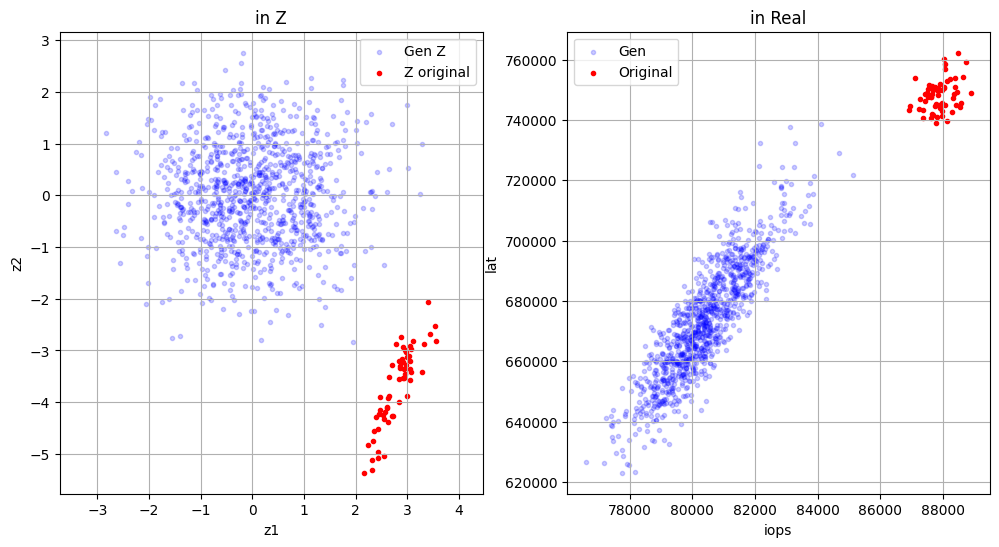

In [131]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[1], zgen_lat[1], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[1], ztotal_lat[1], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[1], gen_lat[1], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[1], total_lat[1], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [132]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[1])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[1])])
arr3 = np.array([[el] for el in np.array(zgen_iops[1])])
arr4 = np.array([[el] for el in np.array(zgen_lat[1])])

In [133]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 22.3781 +- 0.5973
Kolmogorov-Smirnov       = 0.9860 +- 0.0044
Cramer-von Mises         = 18.3654 +- 0.0682
Anderson-Darling         = 190.5923 +- 2.2040
ROC AUC                  = 0.9973 +- 0.0009
Kullback-Leibler KDE     = 5.9662 +- 0.2392
Jensen-Shannon KDE       = 0.6138 +- 0.0058
Maximum Mean Discrepancy = 1.3409 +- 0.0184


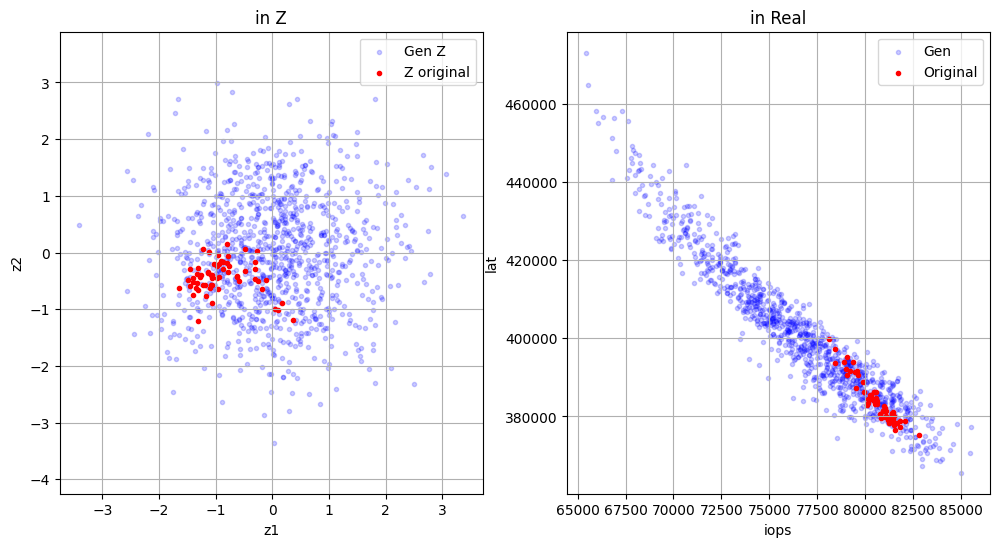

In [134]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[2], zgen_lat[2], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[2], ztotal_lat[2], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[2], gen_lat[2], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[2], total_lat[2], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [135]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[2])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[2])])
arr3 = np.array([[el] for el in np.array(zgen_iops[2])])
arr4 = np.array([[el] for el in np.array(zgen_lat[2])])

In [136]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 1.8624 +- 0.1755
Kolmogorov-Smirnov       = 0.5063 +- 0.0247
Cramer-von Mises         = 5.3735 +- 0.5092
Anderson-Darling         = 31.4915 +- 3.4587
ROC AUC                  = 0.7264 +- 0.0115
Kullback-Leibler KDE     = 0.4630 +- 0.0407
Jensen-Shannon KDE       = 0.1306 +- 0.0109
Maximum Mean Discrepancy = 0.2396 +- 0.0198


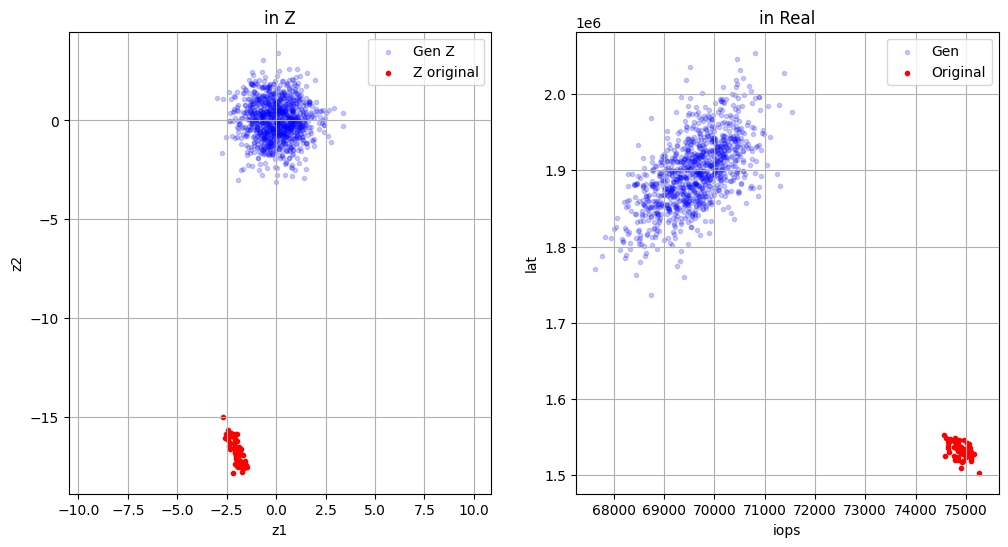

In [137]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[3], zgen_lat[3], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[3], ztotal_lat[3], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[3], gen_lat[3], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[3], total_lat[3], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [138]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[3])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[3])])
arr3 = np.array([[el] for el in np.array(zgen_iops[3])])
arr4 = np.array([[el] for el in np.array(zgen_lat[3])])

In [139]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 286.4101 +- 2.6403
Kolmogorov-Smirnov       = 0.9724 +- 0.0037
Cramer-von Mises         = 17.7669 +- 0.1368
Anderson-Darling         = 175.5564 +- 3.4587
ROC AUC                  = 0.9886 +- 0.0021
Kullback-Leibler KDE     = 7.9316 +- 0.0671
Jensen-Shannon KDE       = 0.5781 +- 0.0055
Maximum Mean Discrepancy = 1.5059 +- 0.0176


'hse-09132022-180712-z63065-read'

## more

In [51]:
train = new_train.copy()
scaler = make_pipeline(LogitScaler(eps=0.01), StandardScaler())
y_tr_ss = scaler.fit_transform(train[['iops', 'lat']].values)
# y_test_ss = scaler.transform(test[['iops', 'lat']].values)
stscaler = StandardScaler()
X_tr_ss = stscaler.fit_transform(train[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
# X_test_ss = stscaler.transform(test[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)

model = RealNVP(lr=0.001, n_layers=12, n_epochs=100, batch_size=64, hidden=(100,), activation='relu') # 200 , activation='relu'
model.fit(y_tr_ss, X_tr_ss) # (target, condition)

ValueError: Expected value argument (Tensor of shape (64, 2)) to be within the support (IndependentConstraint(Real(), 1)) of the distribution MultivariateNormal(loc: torch.Size([2]), covariance_matrix: torch.Size([2, 2])), but found invalid values:
tensor([[-1.3180e+00, -8.7882e-01],
        [ 1.1261e+00,  1.1343e+00],
        [-2.2833e-01, -1.2039e-03],
        [-4.3833e-01,  1.5626e+00],
        [-4.9878e-01,  6.5904e-01],
        [-9.1934e-02,  1.2538e+00],
        [ 1.9082e-01,  3.1238e-01],
        [        nan,         nan],
        [-8.5407e-02, -2.6786e-01],
        [ 3.7255e-01,  9.5320e-01],
        [-4.1710e-01, -4.1581e-03],
        [-3.0992e-01,  1.1498e+00],
        [-1.7030e-01, -3.0053e-01],
        [-2.1241e+00, -5.5480e-01],
        [-1.9748e-01, -9.6344e-02],
        [-7.2546e-01,  1.3910e+00],
        [-4.3303e-01,  8.5029e-01],
        [-3.9784e-02,  1.6057e+00],
        [-8.4101e-01, -3.6195e-01],
        [-1.3695e+00, -5.1295e-01],
        [-5.1821e-02,  1.2903e+00],
        [-7.3304e-01, -6.4669e-01],
        [-1.1256e+00,  4.8249e-01],
        [ 8.0284e-01,  3.4948e-01],
        [ 1.4362e+00,  1.5676e+00],
        [-1.6643e+00, -1.5911e+00],
        [-1.6562e+00, -8.8990e-01],
        [-1.8211e-01, -5.2031e-02],
        [ 2.3974e-01,  3.4737e-01],
        [ 4.7209e-01,  1.0078e+00],
        [ 1.8529e-01,  2.7299e+00],
        [-4.7374e-01, -7.0570e-01],
        [-2.2155e-01,  7.0433e-01],
        [ 1.1519e+00,  1.0292e+00],
        [ 1.1387e+00, -1.1715e-01],
        [-4.9736e-01,  7.1625e-01],
        [-7.3928e-01,  1.2637e+00],
        [-3.8171e-01,  2.3457e-01],
        [ 1.6596e+00, -1.2305e-01],
        [-1.0460e-01,  1.2692e+00],
        [-6.4207e-01,  1.0122e+00],
        [-1.1503e+00, -7.0042e-01],
        [ 5.5766e-01, -5.1753e-01],
        [ 3.9510e-01,  1.4111e+00],
        [ 2.3288e-02,  1.2356e+00],
        [-1.3497e-03,  3.7390e-01],
        [ 1.9535e-01,  3.4588e-01],
        [-2.3131e-01,  1.6824e-01],
        [-9.4809e-01,  1.0536e+00],
        [-8.5652e-01,  3.3383e-01],
        [ 6.2811e-03,  5.4577e-01],
        [-1.0209e+00,  6.5211e-01],
        [-1.2355e+00, -5.2128e-01],
        [-2.2219e-01,  1.5306e+00],
        [-1.2928e+00, -5.2592e-01],
        [-1.4196e-01,  2.1798e-01],
        [-7.7997e-01,  1.0679e+00],
        [-3.9682e-01,  1.4406e+00],
        [-3.4375e-01, -6.5065e-01],
        [-5.6425e-01,  1.0986e-01],
        [-4.6304e-01,  1.0754e+00],
        [-1.2439e-01,  1.1136e-01],
        [ 4.4955e-01,  2.3633e+00],
        [-2.2356e-01,  4.6516e-01]], grad_fn=<AddBackward0>)

## aaa

это код когда я просто проверяла модельку, запускать не нада

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(y_new[0], y_new[1], marker='.', label='Observations', linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

In [ ]:
results1 = []
results2 = []
results3 = []
numb = 10 # 10

for i in range(numb):
  print(i)
  ids = pd.unique(train[['id']]. values.ravel())
  id1 = np.array([np.random.sample() for k in range(len(ids))])
  ar = []
  for j in range(len(ids)):
    if id1[j] <= 0.7:
      ar.append(ids[j])
  train = train.loc[train['id'].isin(ar)]
  scaler = make_pipeline(LogitScaler(eps=0.01), StandardScaler())
  y_tr_ss = scaler.fit_transform(train[['iops', 'lat']].values)
  y_test_ss = scaler.transform(test[['iops', 'lat']].values)
  stscaler = StandardScaler()
  X_tr_ss = stscaler.fit_transform(train[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
  X_test_ss = stscaler.transform(test[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
  # model
  model = RealNVP(lr=0.001, n_layers=24, n_epochs=200, batch_size=64) # 200
  model.fit(y_tr_ss, X_tr_ss) # (target, condition)
  # samples 1
  y_test = torch.tensor(test[test['id'] == 'hse-09132022-180712-z63065'][['iops', 'lat']].values)
  X_test = torch.tensor(test[test['id'] == 'hse-09132022-180712-z63065'][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
  y_gen = model.sample(stscaler.transform(X_test.clone().detach()))
  y_gen = scaler.inverse_transform(y_gen)
  if i == 0:
    results1.append(y_test)
  results1.append(y_gen)
  # samples 2
  y_test_2 = torch.tensor(test[test['id'] == 'hse-09132022-203942-z36542'][['iops', 'lat']].values)
  X_test_2 = torch.tensor(test[test['id'] == 'hse-09132022-203942-z36542'][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
  y_gen_2 = model.sample(stscaler.transform(X_test_2.clone().detach()))
  y_gen_2 = scaler.inverse_transform(y_gen_2)
  if i == 0:
    results2.append(y_test_2)
  results2.append(y_gen_2)
  # samples 3
  y_test_3 = torch.tensor(test[test['id'] == 'hse-09132022-192053-z87989'][['iops', 'lat']].values)
  X_test_3 = torch.tensor(test[test['id'] == 'hse-09132022-192053-z87989'][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
  y_gen_3 = model.sample(stscaler.transform(X_test_3.clone().detach()))
  y_gen_3 = scaler.inverse_transform(y_gen_3)
  if i == 0:
    results3.append(y_test_3)
  results3.append(y_gen_3)

0


<ipython-input-20-a80eb4482932>:15: RuntimeWarning: invalid value encountered in log
  logit = np.log(x_norm/(1-x_norm))


1


<ipython-input-20-a80eb4482932>:15: RuntimeWarning: invalid value encountered in log
  logit = np.log(x_norm/(1-x_norm))


2


<ipython-input-20-a80eb4482932>:15: RuntimeWarning: invalid value encountered in log
  logit = np.log(x_norm/(1-x_norm))


3


<ipython-input-20-a80eb4482932>:15: RuntimeWarning: invalid value encountered in log
  logit = np.log(x_norm/(1-x_norm))


In [ ]:
colors = np.array(["blue","red","green","yellow","pink","black","orange","purple","brown","cyan","magenta"])

In [ ]:
plt.figure(figsize=(12, 6))

plt.scatter(results1[0][:, 0], results1[0][:, 1], marker='.', label='Observations', color=colors[0], linewidth=1)
for i in range(1, numb+1):
  plt.scatter(results1[i][:, 0], results1[i][:, 1], marker='.', label='Generated with NF', color=colors[i], linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))

plt.scatter(results2[0][:, 0], results2[0][:, 1], marker='.', label='Observations', color=colors[0], linewidth=1)
for i in range(1, numb+1):
  plt.scatter(results2[i][:, 0], results2[i][:, 1], marker='.', label='Generated with NF', color=colors[i], linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))

plt.scatter(results3[0][:, 0], results3[0][:, 1], marker='.', label='Observations', color=colors[0], linewidth=1)
for i in range(1, numb+1):
  plt.scatter(results3[i][:, 0], results3[i][:, 1], marker='.', label='Generated with NF', color=colors[i], linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()